In [13]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_curve, roc_auc_score

file_name1 = "breast-cancer-wisconsin.data"
file_name2 = "breast-cancer-wisconsin-original.data"

# loading the 2 datasets
df1 = pd.read_csv(file_name1, names = [0]+['y']+list(range(2,32)))
df2 = pd.read_csv(file_name2,  names = list(range(0,10))+['y'] )


# # lets remove the first fields of id in both
df1 = df1[list(range(2,32))+['y']]
df2 = df2[list(range(1, 10))+['y']]

# # lets map Malignant and Benign to 0 and 1
df1['y'] = df1.y.map({'M':0, 'B':1})

# # similarly for df2
df2['y'] = df2.y.map({4:0, 2:1})


# the number of entries in both
print("dataframe1 has the shape", df1.shape)
print("dataframe2 has the shape", df2.shape)
print()

# check the number of 0 and 1 entries
print("dataframe1 has", list(df1['y']).count(0), " malignant entries and", list(df1['y']).count(1), " benign entries")
print("dataframe2 has", list(df2['y']).count(0), " malignant entries and", list(df2['y']).count(1), " benign entries")
print()

# looping over to see the difference between the max and min for each attribute of concern (2 to 32)
# for i in range(2, df1.shape[0]):
#     print(max(df1[i]) - min(df1[i]))


# # lets do an 80-20 split for train and test in both df
X_train1, X_test1, y_train1, y_test1 = train_test_split(df1[list(range(2,32))], df1['y'], train_size=0.8, random_state=1)
print(f'The training 1 set contains {X_train1.shape[0]} examples.')
print(f'The testing 1 set contains {X_test1.shape[0]} examples.')
print()

# huge differences, so lets smooth it out
sc = StandardScaler()
sc.fit(X_train1)
X_train1 = sc.transform(X_train1)
X_test1 = sc.transform(X_test1)

df1.reset_index()
df2.reset_index()

df2_org = df2.copy(deep = True)
df1_org = df1.copy(deep = True)


dataframe1 has the shape (569, 31)
dataframe2 has the shape (699, 10)

dataframe1 has 212  malignant entries and 357  benign entries
dataframe2 has 241  malignant entries and 458  benign entries

The training 1 set contains 455 examples.
The testing 1 set contains 114 examples.



Trying Gaussian Naive Bayes

Number of mislabeled points out of a total 114 points : 6

accuracy of GNB is 94.73684210526315 %


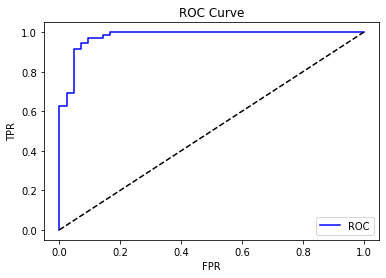

0.9788359788359788


In [14]:
from sklearn.naive_bayes import GaussianNB

gnb = GaussianNB()

mod = gnb.fit(X_train1, y_train1)

y_pred = mod.predict(X_test1)

y_score = mod.predict_proba(X_test1)

print("Number of mislabeled points out of a total %d points : %d" % (X_test1.shape[0], (y_test1 != y_pred).sum()))
print()

print("accuracy of GNB is", accuracy_score(y_test1, y_pred)*100, "%")

def plot_roc_curve(fpr, tpr):
  plt.plot(fpr, tpr, color='blue', label='ROC')
  plt.plot([0, 1], [0, 1], color='black', linestyle='--')
  plt.xlabel('FPR')
  plt.ylabel('TPR')
  plt.title('ROC Curve')
  plt.legend()
  plt.show()

pred = []
for e in y_score:
    pred.append(e[1])

fpr, tpr, t = roc_curve(y_test1, pred)

plot_roc_curve(fpr, tpr)

print(roc_auc_score(y_test1,pred))

Training dataset2

median approach

In [55]:
import statistics

ints = []
index = 0
indexes = []

# for e in df2[6]:
#     print(e, type(e))

for e in df2[6]:
    if type(e) == int:
        ints.append(e)
    if type(e) == str:
        if e.isnumeric():
            df2.at[index, 6] = int(e)
            ints.append(int(e))
        else:
            indexes.append(index)

    index+=1
print("missing/lost", df2[2].size - len(ints), "entries in column 6 at indexes:\n", indexes)
print()
median = statistics.median(ints)
print("found median to be:", median)


#replacing
for e in indexes:
    df2.at[e, 6] = median

# if it prints then we missed something
print("lets recheck")
for e in df2[6]:
    if(type(e) != int):
        print(e)

X_train2, X_test2, y_train2, y_test2 = train_test_split(df2[list(range(1,10))], df2['y'], train_size=0.8, random_state=1)
print(f'The training 2 set contains {X_train2.shape[0]} examples.')
print(f'The testing 2 set contains {X_test2.shape[0]} examples.')

s2 = StandardScaler()
s2.fit(X_train2)
X_train2 = s2.transform(X_train2)
X_test2 = s2.transform(X_test2)

df2.head()

missing/lost 0 entries in column 6 at indexes:
 []

found median to be: 1
lets recheck
The training 2 set contains 559 examples.
The testing 2 set contains 140 examples.


,1,2,3,4,5,6,7,8,9,y
0,5,1,1,1,2,1,3,1,1,1
1,5,4,4,5,7,10,3,2,1,1
2,3,1,1,1,2,2,3,1,1,1
3,6,8,8,1,3,4,3,7,1,1
4,4,1,1,3,2,1,3,1,1,1


Number of mislabeled points out of a total 140 points : 5

accuracy of GNB is 96.42857142857143 %


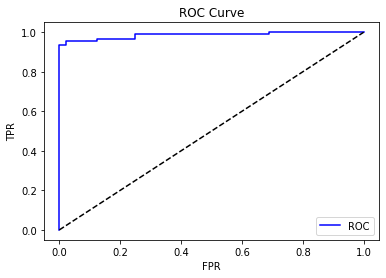

0.9852807971014492


In [56]:
from sklearn.naive_bayes import GaussianNB

gnb2 = GaussianNB()

mod2 = gnb2.fit(X_train2, y_train2)

y_pred2 = mod2.predict(X_test2)

y_score2 = mod2.predict_proba(X_test2)

print("Number of mislabeled points out of a total %d points : %d" % (X_test2.shape[0], (y_test2 != y_pred2).sum()))
print()

print("accuracy of GNB is", accuracy_score(y_test2, y_pred2)*100, "%")

def plot_roc_curve(fpr, tpr):
  plt.plot(fpr, tpr, color='blue', label='ROC')
  plt.plot([0, 1], [0, 1], color='black', linestyle='--')
  plt.xlabel('FPR')
  plt.ylabel('TPR')
  plt.title('ROC Curve')
  plt.legend()
  plt.show()

pred2 = []
for e in y_score2:
    pred2.append(e[1])

fpr2, tpr2, t2 = roc_curve(y_test2, pred2)

plot_roc_curve(fpr2, tpr2)

print(roc_auc_score(y_test2,pred2))

lets remove entries and re-do it

In [61]:
df3 = df2_org.copy(deep = True)

index = 0
indexes = []

for e in df3[6]:
    if type(e) == str:
        if e.isnumeric():
            df3.at[index, 6] = int(e)
        else:
            indexes.append(index)
    index+=1

print("indexes:", indexes)

for e in reversed(indexes):
    df3 = df3.drop(df3.index[e])

print("dropped:", 699-df3.shape[0], "rows")

X_train3, X_test3, y_train3, y_test3 = train_test_split(df3[list(range(1,10))], df3['y'], train_size=0.8, random_state=1)
print(f'The training 2 set contains {X_train3.shape[0]} examples.')
print(f'The testing 2 set contains {X_test3.shape[0]} examples.')

s3 = StandardScaler()
s3.fit(X_train3)
X_train3 = s3.transform(X_train3)
X_test3 = s3.transform(X_test3)

indexes: [23, 40, 139, 145, 158, 164, 235, 249, 275, 292, 294, 297, 315, 321, 411, 617]
dropped: 16 rows
The training 2 set contains 546 examples.
The testing 2 set contains 137 examples.


Number of mislabeled points out of a total 137 points : 0

accuracy of GNB is 100.0 %


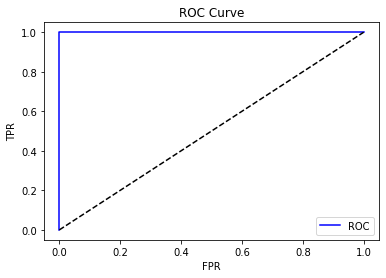

1.0


In [62]:
from sklearn.naive_bayes import GaussianNB

gnb3 = GaussianNB()

mod3 = gnb3.fit(X_train3, y_train3)

y_pred3 = mod3.predict(X_test3)

print("Number of mislabeled points out of a total %d points : %d" % (X_test3.shape[0], (y_test3 != y_pred3).sum()))
print()

print("accuracy of GNB is", accuracy_score(y_test3, y_pred3)*100, "%")

y_score3 = mod3.predict_proba(X_test3)

def plot_roc_curve(fpr, tpr):
  plt.plot(fpr, tpr, color='blue', label='ROC')
  plt.plot([0, 1], [0, 1], color='black', linestyle='--')
  plt.xlabel('FPR')
  plt.ylabel('TPR')
  plt.title('ROC Curve')
  plt.legend()
  plt.show()

pred3 = []
for e in y_score3:
    pred3.append(e[1])

fpr3, tpr3, t3 = roc_curve(y_test3, pred3)

plot_roc_curve(fpr3, tpr3)

print(roc_auc_score(y_test3,pred3))